In [ ]:
# This is a series of examples using the icanswim/qchem quantum mechanic machine learning repo
# icanswim/qchem utilizes the icanswim/cosmosis data science machine learning repo

In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.dataset import SKDS
from cosmosis.learning import Learn, Selector

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

RDKit WARNING: [19:39:27] Enabling RDKit 2019.09.3 jupyter extensions


CDataset created...
SKDS make_regression created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:02.557831
epoch: 0, lr: 0.01
train loss: 3359.8147356951677, val loss: 1100.2727783203125
learning time: 0:00:09.906653
epoch: 10, lr: 0.005
train loss: 126.48715266474971, val loss: 131.93219146728515
test loss: 77.67417068481446
learning time: 0:00:16.833879


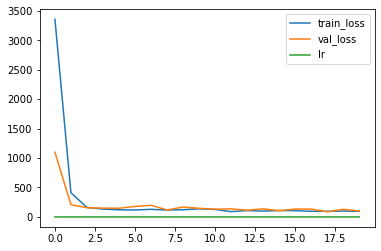

In [2]:
## Example using scikit dataset wrapper SKDS and custom model
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=20)

CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:01.203216
epoch: 0, lr: 0.01
train loss: 1531.2533151726973, val loss: 1501.4515991210938
learning time: 0:00:10.719077
epoch: 10, lr: 0.01
train loss: 35.654843982897304, val loss: 34.092692375183105
test loss: 31.846909999847412
learning time: 0:00:19.606586


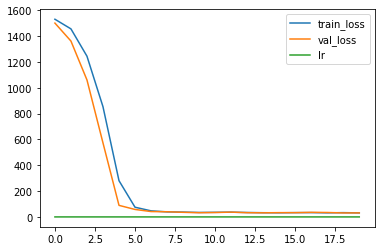

In [3]:
## Example using QM7 dataset and custom model with embeddings
model_params = {'D_in': 23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,None,True)]}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['ae'],
                              'embeds': ['atoms'],
                              'in_file': './data/qm7/qm7.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=20)

CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:04.304714
epoch: 0, lr: 0.01
train loss: 1562.3330013877467, val loss: 1545.7503051757812
learning time: 0:00:09.138670
epoch: 10, lr: 0.01
train loss: 56.058465455707754, val loss: 63.240118980407715
test loss: 54.08337879180908
learning time: 0:00:13.635765


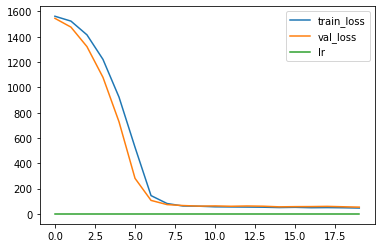

In [2]:
## Example using the QM7b dataset
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10,
                  'log_plot': False}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params, 
          batch_size=256, epochs=20)

In [3]:
## Find the longest molecule in the QM7X dataset
ds_params = {'train_params': {'features': ['atNUM'],
                              'pad': None,
                              'targets': [],
                              'embeds': [],
                              'selector': ['opt']}}

qm7x = QM7X(**ds_params['train_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape[0]
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
longest molecule length:  23


(array([6., 1., 1., 1., 1.], dtype=float32), [], [])

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:01.106862
epoch: 0, lr: 0.01
train loss: 66.32384591353566, val loss: 45.28047466278076
learning time: 0:00:10.402385
epoch: 10, lr: 0.01
train loss: 2.389947615171734, val loss: 2.1670390367507935
learning time: 0:00:19.612806
epoch: 20, lr: 0.005
train loss: 1.9297497335233187, val loss: 2.219036787748337
learning time: 0:00:29.053066
epoch: 30, lr: 0.005
train loss: 2.042391350394801, val loss: 1.5507062375545502
learning time: 0:00:38.343

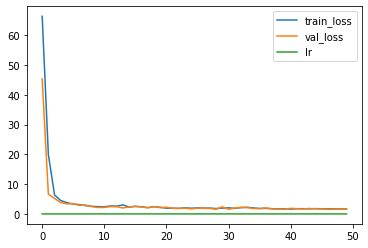

In [5]:
## Example using the QM7X dataset and custom model with embeddings
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atNUM',9,64,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'do_not_pad':['eAT'],
                              'targets': ['eAT'],
                              'embeds': ['atNUM'],
                              'selector': ['opt'],
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          batch_size=256, epochs=50)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  273
total QM9 molecules created:  9727
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:01.058659
epoch: 0, lr: 0.01
train loss: 337.2228546142578, val loss: 289.00916748046876
learning time: 0:00:10.238823
epoch: 10, lr: 0.01
train loss: 8.54376455453726, val loss: 9.194841003417968
test loss: 7.219927978515625
learning time: 0:00:18.807854


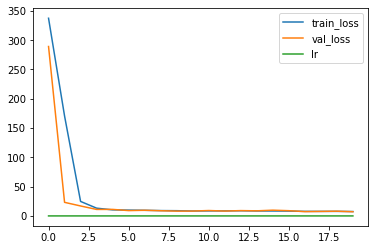

In [6]:
## Example using the QM9 dataset
model_params = {'D_in': 29*29+12+29,
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'n': 10000, 
                              'features': ['n_atoms','A','B','C','mu','alpha','homo','lumo', 
                                           'gap','r2','zpve','Cv','mulliken','coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29,
                              'do_not_pad': ['n_atoms','A','B','C','mu','alpha','homo','lumo',
                                             'gap','r2','zpve','Cv','U0'],
                              'filter_on': None,
                              'use_pickle': False,
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params, 
          batch_size=256, epochs=20)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  7287
QM9 molecules scanned:  20001
QM9 molecules created:  13164
QM9 molecules scanned:  30001
QM9 molecules created:  21160
QM9 molecules scanned:  40001
QM9 molecules created:  25975
QM9 molecules scanned:  50001
QM9 molecules created:  32322
QM9 molecules scanned:  60001
QM9 molecules created:  36152
QM9 molecules scanned:  70001
QM9 molecules created:  39355
QM9 molecules scanned:  80001
QM9 molecules created:  42400
QM9 molecules scanned:  90001
QM9 molecules created:  44727
QM9 molecules scanned:  100001
QM9 molecules created:  46655
QM9 molecules scanned:  110001
QM9 molecules created:  47869
QM9 molecules scanned:  120001
QM9 molecules created:  48834
QM9 molecules scanned:  130001
QM9 molecules created:  54225
total uncharacterized molecules removed:  2193
total QM9 molecules created:  55799
CDataset created...
FFNet model loaded...
CModel loaded...

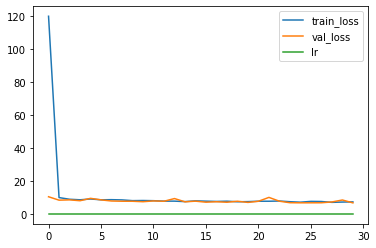

In [2]:
## Example using the QM9 dataset filter
model_params = {'D_in': 17*17+17+12, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {#'n': 10000,
                              'features': ['n_atoms','A','B','C','mu','alpha','homo','lumo', 
                                           'gap','r2','zpve','Cv','mulliken','coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': 17,
                              'do_not_pad': ['n_atoms','A','B','C','mu','alpha','homo','lumo',
                                             'gap','r2','zpve','Cv','U0'],
                              'filter_on': ('n_atoms','<','18'),
                              'use_pickle': False,
                              'flatten': True}}

crit_params = {'reduction': 'sum'}

metrics_params = {'report_interval': 10,
                  'log_plot': True}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          batch_size=256, epochs=30)

molecules loaded:  1000
molecules loaded:  2000
molecules loaded:  3000
molecules loaded:  3114
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...
learning time: 0:00:02.474422
epoch: 0, lr: 0.01
train loss: 564.2387372185202, val loss: 530.0924072265625
learning time: 0:00:13.731332
epoch: 6, lr: 0.01
train loss: 44.271240234375, val loss: 38.50212097167969
learning time: 0:00:21.158404
epoch: 10, lr: 0.01
train loss: 36.388308693380914, val loss: 38.48035558064779
learning time: 0:00:32.073717
epoch: 16, lr: 0.005
train loss: 29.08654717838063, val loss: 27.6531982421875
learning time: 0:00:39.372295
epoch: 20, lr: 0.005
train loss: 29.179754930384018, val loss: 38.72963078816732
learning time: 0:00:50.418566
epoch: 26, lr: 0.005
train loss: 29.168325311997357, val loss: 27.489192962646484
learning time: 0:00:57.908339
epoch: 30, lr: 0.0025
train loss: 22.698432249181412, val loss: 25.050204594930012
learning time: 0:01:08.773288
epoch: 36, lr: 0.0025


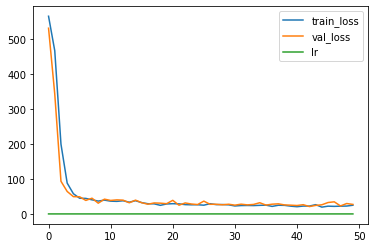

In [3]:
## Example using ANI1x dataset with filter and embeddings with a custom model
model_params = {'D_in': 63*63+63*32, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atomic_numbers',9,32,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embeds': ['atomic_numbers'],
                              'pad': 63, #length of the longest molecule in the dataset
                              'flatten': True,
                              'criterion': ['wb97x_dz.energy'],
                              'conformation': 'max',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

metrics_params = {'report_interval': 20}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          batch_size=128, epochs=50)